# Sigma model on a quantum device

Sigma model Hamiltonian
$$ a\mathcal{H} = \frac{1}{2\beta}\sum_{k=1}^{N} \mathbf{J}_k^2 - \beta \sum_{k=1}^{N-1}n_k n_{k+1} $$
$n_k n_{k+1}$ can be rewritten as (see [this paper](https://link.aps.org/doi/10.1103/PhysRevD.99.074501))
$$ n_k n_{k+1} = n^+_k n^-_{k+1} + n^-_k n^+_{k+1} + n^z_k n^z_{k+1}$$


For 4D local Hilbert-space, these terms can be written as
$$ n^+ = \frac{1}{\sqrt{3}}\left(\begin{matrix} 0 & 0 & 0 & -1 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{matrix}\right)\quad , \quad
n^- = \frac{1}{\sqrt{3}}\left(\begin{matrix} 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ -1 & 0 & 0 & 0 \end{matrix}\right)\quad , \quad
n^z = \frac{1}{\sqrt{3}}\left(\begin{matrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{matrix}\right)
$$
and the kinetic term
$$ \mathcal{H}^0 = \left(\begin{matrix} 0 & 0 & 0 & 0 \\ 0 & 2 & 0 & 0 \\ 0 & 0 & 2 & 0 \\ 0 & 0 & 0 & 2 \end{matrix}\right)$$


To use these on a quantum device, they need to be decomposed into Pauli basis i.e. $\{I, X, Y, Z\}$ which is equavalent to $\{ \mathbb{1}, \sigma_x, \sigma_y, \sigma_z\}$
$$ \mathcal{H}^0 = \frac{1}{2} (3\ II - IZ - ZI - ZZ )$$
$$ n_k n_{k+1} = \frac{1}{24}(IXIX-IXXX+IXYY+IXZX+IYIY+IYXY+IYYX+IYZY+2XIXI+2XIXZ-XXIX+XXXX-XXYY-XXZX+XYIY+
XYXY+XYYX+XYZY+2XZXI+2XZXZ+YXIY+YXXY+YXYX+YXZY+YYIX-YYXX+YYYY+YYZX+ZXIX-ZXXX+ZXYY+ZXZX+ZYIY+ZYXY+ZYYX+ZYZY)
$$


**Notation:** $\sigma_x^0\otimes\sigma_y^1 = XY$

In [1]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt
from typing import Sequence

Define $\beta$ parameter range

In [2]:
beta = np.linspace(0.7, 1.8, 12)

### Construct Hamiltonian in Pennylane

In [3]:
def Hamiltonian(beta: float):
    kinetic = lambda n0, n1 : [qml.Identity(n0) @ qml.Identity(n1), 
                               qml.Identity(n0) @ qml.PauliZ(n1),
                               qml.PauliZ(n0) @ qml.Identity(n1),
                               qml.PauliZ(n0) @ qml.PauliZ(n1)]
    kinetic_term = kinetic(0,1) + kinetic(2,3) + kinetic(4,5)
    kinetic_coeff = [1.5, -0.5, -0.5, -0.5] * 3
    kinetic_coeff = [x/(2.*beta) for x in kinetic_coeff]
    
    interaction = lambda n0, n1, n2, n3: [qml.Identity(n0) @ qml.PauliX(n1) @ qml.Identity(n2) @ qml.PauliX(n3),
                                          qml.Identity(n0) @ qml.PauliX(n1) @ qml.PauliX(n2) @ qml.PauliX(n3),
                                          qml.Identity(n0) @ qml.PauliX(n1) @ qml.PauliY(n2) @ qml.PauliY(n3),
                                          qml.Identity(n0) @ qml.PauliX(n1) @ qml.PauliZ(n2) @ qml.PauliX(n3),
                                          qml.Identity(n0) @ qml.PauliY(n1) @ qml.Identity(n2) @ qml.PauliY(n3),
                                          qml.Identity(n0) @ qml.PauliY(n1) @ qml.PauliX(n2) @ qml.PauliY(n3),
                                          qml.Identity(n0) @ qml.PauliY(n1) @ qml.PauliY(n2) @ qml.PauliX(n3),
                                          qml.Identity(n0) @ qml.PauliY(n1) @ qml.PauliZ(n2) @ qml.PauliY(n3),
                                          qml.PauliX(n0) @ qml.Identity(n1) @ qml.PauliX(n2) @ qml.Identity(n3),
                                          qml.PauliX(n0) @ qml.Identity(n1) @ qml.PauliX(n2) @ qml.PauliZ(n3),
                                          qml.PauliX(n0) @ qml.PauliX(n1) @ qml.Identity(n2) @ qml.PauliX(n3),
                                          qml.PauliX(n0) @ qml.PauliX(n1) @ qml.PauliX(n2) @ qml.PauliX(n3),
                                          qml.PauliX(n0) @ qml.PauliX(n1) @ qml.PauliY(n2) @ qml.PauliY(n3),
                                          qml.PauliX(n0) @ qml.PauliX(n1) @ qml.PauliZ(n2) @ qml.PauliX(n3),
                                          qml.PauliX(n0) @ qml.PauliY(n1) @ qml.Identity(n2) @ qml.PauliY(n3),
                                          qml.PauliX(n0) @ qml.PauliY(n1) @ qml.PauliX(n2) @ qml.PauliY(n3),
                                          qml.PauliX(n0) @ qml.PauliY(n1) @ qml.PauliY(n2) @ qml.PauliX(n3),
                                          qml.PauliX(n0) @ qml.PauliY(n1) @ qml.PauliZ(n2) @ qml.PauliY(n3),
                                          qml.PauliX(n0) @ qml.PauliZ(n1) @ qml.PauliX(n2) @ qml.Identity(n3),
                                          qml.PauliX(n0) @ qml.PauliZ(n1) @ qml.PauliX(n2) @ qml.PauliZ(n3),
                                          qml.PauliY(n0) @ qml.PauliX(n1) @ qml.Identity(n2) @ qml.PauliY(n3),
                                          qml.PauliY(n0) @ qml.PauliX(n1) @ qml.PauliX(n2) @ qml.PauliY(n3),
                                          qml.PauliY(n0) @ qml.PauliX(n1) @ qml.PauliY(n2) @ qml.PauliX(n3),
                                          qml.PauliY(n0) @ qml.PauliX(n1) @ qml.PauliZ(n2) @ qml.PauliY(n3),
                                          qml.PauliY(n0) @ qml.PauliY(n1) @ qml.Identity(n2) @ qml.PauliX(n3),
                                          qml.PauliY(n0) @ qml.PauliY(n1) @ qml.PauliX(n2) @ qml.PauliX(n3),
                                          qml.PauliY(n0) @ qml.PauliY(n1) @ qml.PauliY(n2) @ qml.PauliY(n3),
                                          qml.PauliY(n0) @ qml.PauliY(n1) @ qml.PauliZ(n2) @ qml.PauliX(n3),
                                          qml.PauliZ(n0) @ qml.PauliX(n1) @ qml.Identity(n2) @ qml.PauliX(n3),
                                          qml.PauliZ(n0) @ qml.PauliX(n1) @ qml.PauliX(n2) @ qml.PauliX(n3),
                                          qml.PauliZ(n0) @ qml.PauliX(n1) @ qml.PauliY(n2) @ qml.PauliY(n3),
                                          qml.PauliZ(n0) @ qml.PauliX(n1) @ qml.PauliZ(n2) @ qml.PauliX(n3),
                                          qml.PauliZ(n0) @ qml.PauliY(n1) @ qml.Identity(n2) @ qml.PauliY(n3),
                                          qml.PauliZ(n0) @ qml.PauliY(n1) @ qml.PauliX(n2) @ qml.PauliY(n3),
                                          qml.PauliZ(n0) @ qml.PauliY(n1) @ qml.PauliY(n2) @ qml.PauliX(n3),
                                          qml.PauliZ(n0) @ qml.PauliY(n1) @ qml.PauliZ(n2) @ qml.PauliY(n3)]
    interaction_term = interaction(0,1,2,3) + interaction(2,3,4,5) + interaction(4,5,0,1)
    
    interaction_coeff = [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0,
                         1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0,
                         1.0, 1.0, 1.0, 1.0] * 3
    interaction_coeff = [-beta * x / 24. for x in interaction_coeff]
    
    return qml.Hamiltonian(kinetic_coeff + interaction_coeff, kinetic_term + interaction_term)

### Check Hamiltonian with the exact diagonalisation

$E_0$ is the ground state and $E_1$ is the first excited state!!

In [13]:
E0_ed, E1_ed = [], []
for b in beta:
    H = Hamiltonian(b)
    e, v = np.linalg.eigh(qml.matrix(H))
    E0_ed.append(e[0])
    E1_ed.append(e[1])

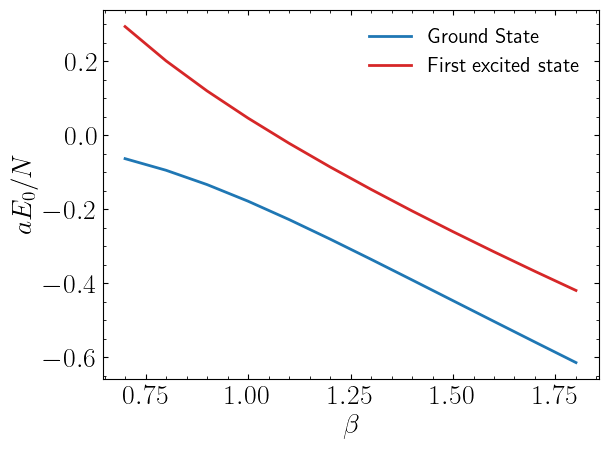

In [14]:
plt.plot(beta, np.array(E0_ed)/3, color = "tab:blue")
plt.plot(beta, np.array(E1_ed)/3, color = "tab:red")
plt.legend(["Ground State", "First excited state"])
plt.xlabel("$\\beta$")
plt.ylabel("$aE_0/N$")
plt.show()

Define a unit ansatz

In [6]:
def SimplifiedTwoBlock_U3(weights: np.ndarray, wires: Sequence[int] , skip_initial: bool = False, entangler: str = "CZ") -> None:
    """ Simplified two block design ref. arXiv:1502.07514, arXiv:1803.11173 """
    if skip_initial:
        assert weights.shape[0] == 2, f"Wrong number of weights: {weights.shape[0]} given, 2 needed."
    else:
        assert weights.shape[0] == 4, f"Wrong number of weights: {weights.shape[0]} given, 4 needed."
    assert len(wires) == 2, f"Wrong number of wires: {len(wires)} given, 2 needed."
    
    if not skip_initial:
        w3, w4 = weights[2,:], weights[3,:]
        qml.U3(*weights[0,:], wires[0])
        qml.U3(*weights[1,:], wires[1])
    else:
        w3, w4 = weights[0,:], weights[1,:]
    getattr(qml, entangler)(wires=[wires[0],wires[1]])
    qml.U3(*w3, wires[0])
    qml.U3(*w4, wires[1])
    
def SimplifiedFourBlock_U3(weights: np.ndarray, wires: Sequence[int] , skip_initial: bool = False, entangler: str = "CZ") -> None:
    """ Based on Simplified two block design """
    if skip_initial:
        assert weights.shape[0] == 4, f"Wrong number of weights: {weights.shape[0]} given, 4 needed."
    else:
        assert weights.shape[0] == 8, f"Wrong number of weights: {weights.shape[0]} given, 8 needed."
    
    assert len(wires) == 4, f"Wrong number of wires: {len(wires)} given, 4 needed."
    
    if not skip_initial:
        for idx, weight in enumerate(weights[:4,:]):
            qml.U3(*weight, wires[idx])
        getattr(qml, entangler)(wires=[wires[0],wires[1]])
        getattr(qml, entangler)(wires=[wires[1],wires[2]])
        getattr(qml, entangler)(wires=[wires[2],wires[3]])
        for idx, weight in enumerate(weights[4:,:]):
            qml.U3(*weight, wires[idx])
    else:
        getattr(qml, entangler)(wires=[wires[0],wires[1]])
        getattr(qml, entangler)(wires=[wires[1],wires[2]])
        getattr(qml, entangler)(wires=[wires[2],wires[3]])
        for idx, weight in enumerate(weights[:4, :]):
            qml.U3(*weight, wires[idx])

Define $U(\phi)$

In [7]:
def ansatz(weights):
    SimplifiedTwoBlock_U3(weights[:4,:], [0,1], entangler = "CNOT")
    SimplifiedTwoBlock_U3(weights[4:8,:], [2,3], entangler = "CNOT")
    SimplifiedTwoBlock_U3(weights[8:12,:], [4,5], entangler = "CNOT")

    SimplifiedFourBlock_U3(weights[12:16,:], [0,1,2,3], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[16:20,:], [0,1,2,3], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[20:24,:], [0,1,2,3], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[24:28,:], [0,1,2,3], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[28:32,:], [0,1,2,3], True, entangler = "CNOT")

    SimplifiedFourBlock_U3(weights[32:36,:], [2,3,4,5], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[36:40,:], [2,3,4,5], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[40:44,:], [2,3,4,5], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[44:48,:], [2,3,4,5], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[48:52,:], [2,3,4,5], True, entangler = "CNOT")

    SimplifiedFourBlock_U3(weights[52:56,:], [4,5,0,1], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[56:60,:], [4,5,0,1], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[60:64,:], [4,5,0,1], True, entangler = "CNOT")
    SimplifiedFourBlock_U3(weights[64:68,:], [4,5,0,1], True, entangler = "CNOT")

Plot the variational circuit:

Exact decomposition = -0.178 <= <H>_psi = 0.671


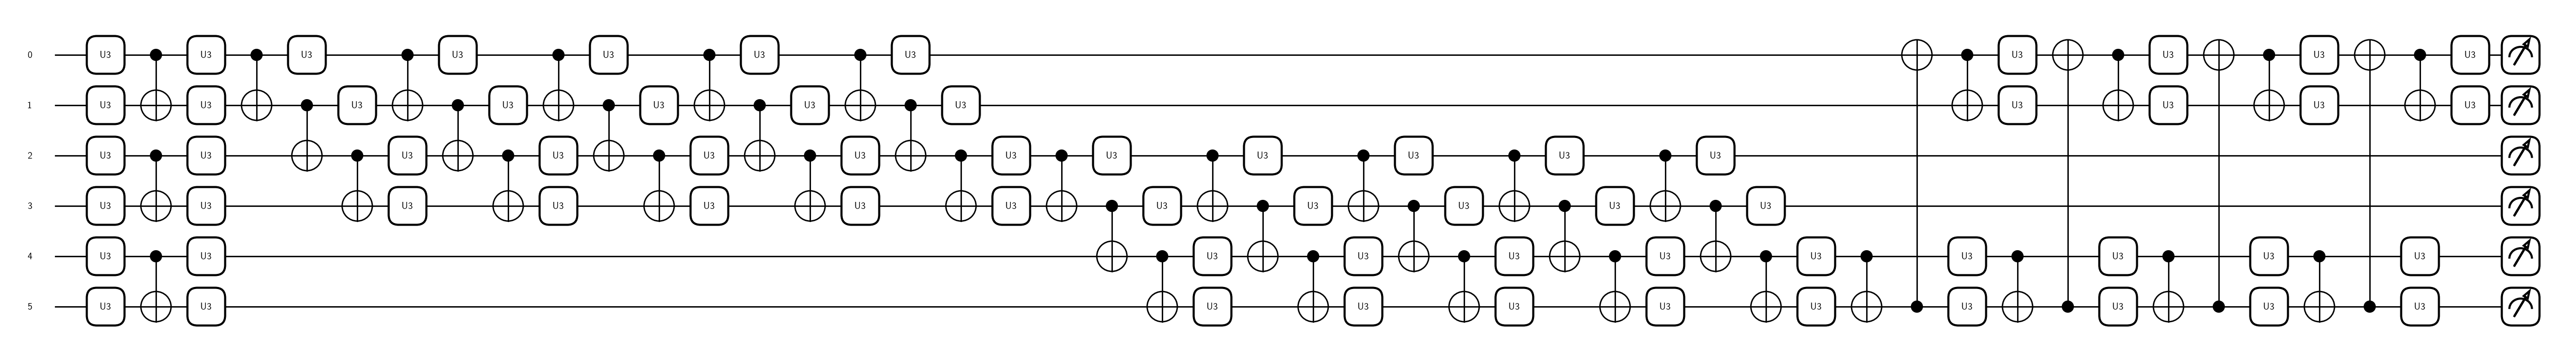

In [8]:
dev = qml.device("default.qubit", wires = range(6))

H = Hamiltonian(1.)

@qml.qnode(dev)
def circuit(weights): 
    
    ansatz(weights)

    return qml.expval(H)
qml.draw_mpl(circuit)(np.random.uniform(0,1,(68,3)))

e,_ = np.linalg.eigh(qml.matrix(H))
print(f"Exact decomposition = {e[0]/3:.3f} <= <H>_psi = {circuit(np.random.uniform(0,1,(68,3)))/3.:.3f}")

/Users/jackaraz/packages/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  onp.add.at(A, idx, x)


Final value of the ground-state energy for beta 0.7 = -0.061 


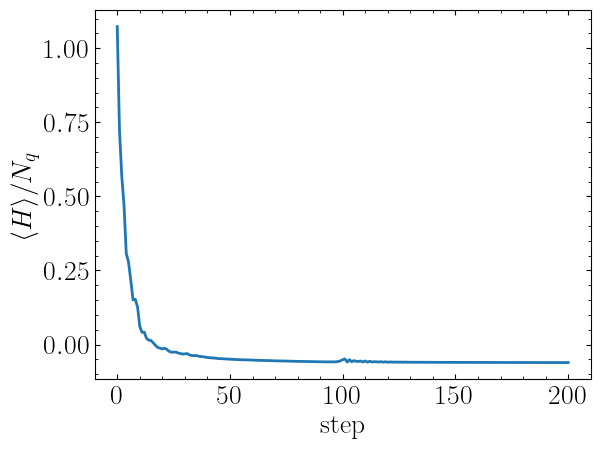

/Users/jackaraz/packages/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  onp.add.at(A, idx, x)


Final value of the ground-state energy for beta 0.8 = -0.094 


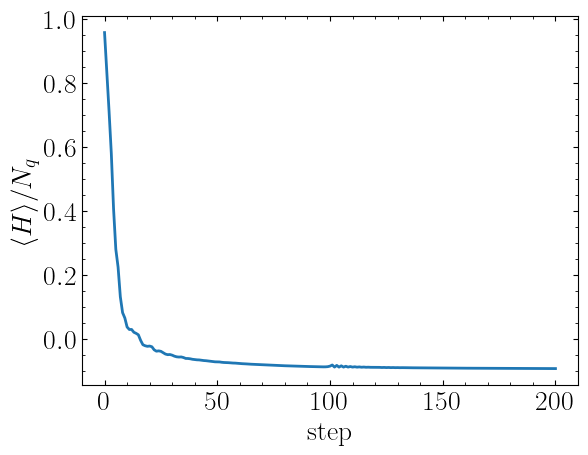

Final value of the ground-state energy for beta 0.9 = -0.131 


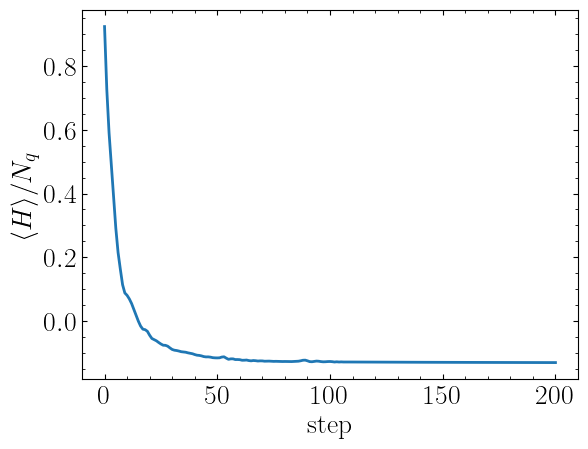

Final value of the ground-state energy for beta 1.0 = -0.177 


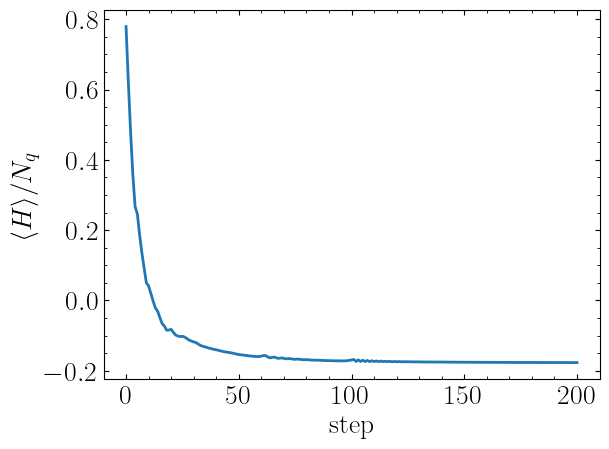

Final value of the ground-state energy for beta 1.1 = -0.226 


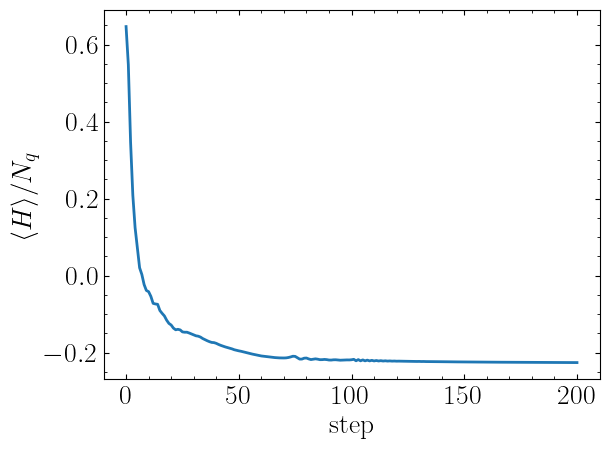

Final value of the ground-state energy for beta 1.2 = -0.280 


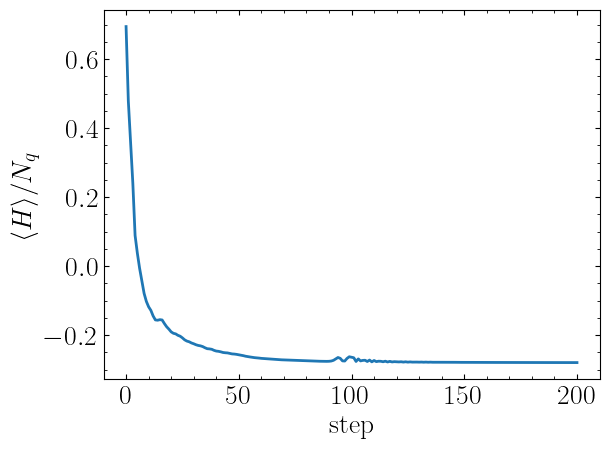

Final value of the ground-state energy for beta 1.3 = -0.332 


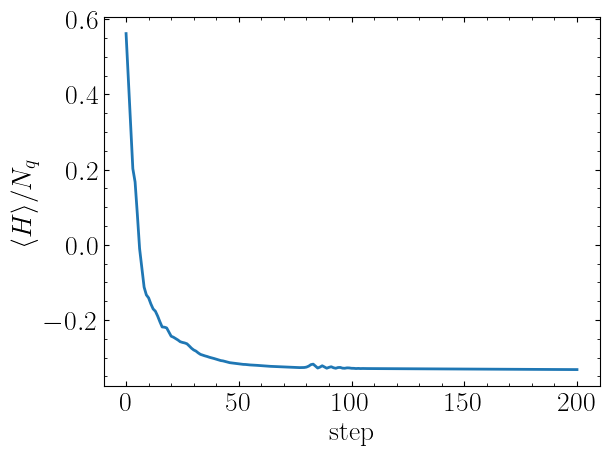

Final value of the ground-state energy for beta 1.4 = -0.387 


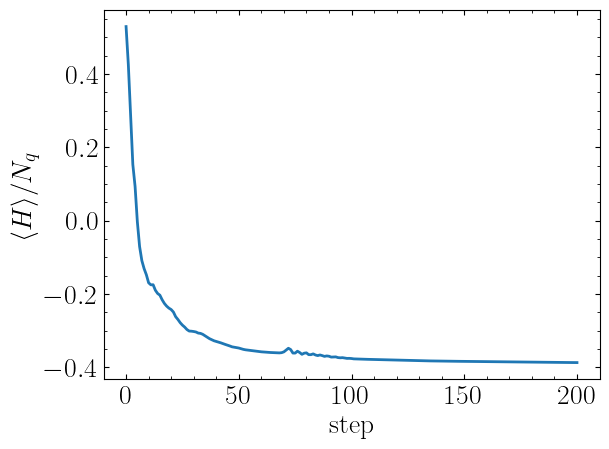

Final value of the ground-state energy for beta 1.5 = -0.445 


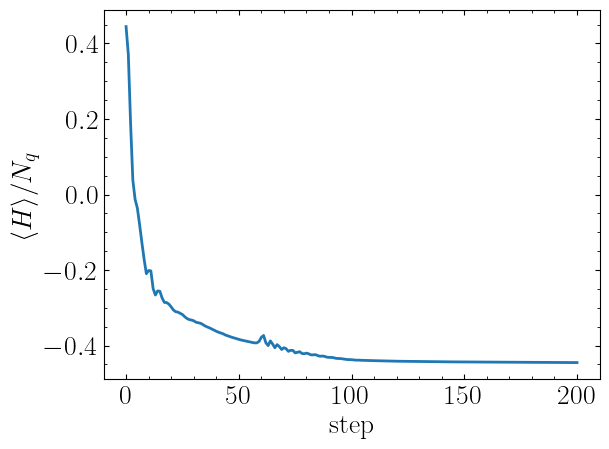

Final value of the ground-state energy for beta 1.6 = -0.499 


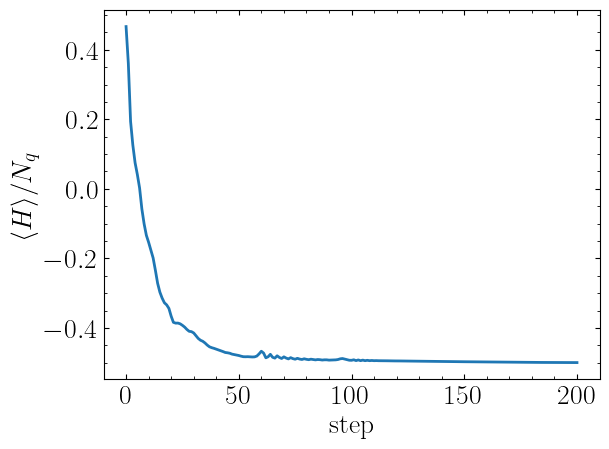

Final value of the ground-state energy for beta 1.7 = -0.556 


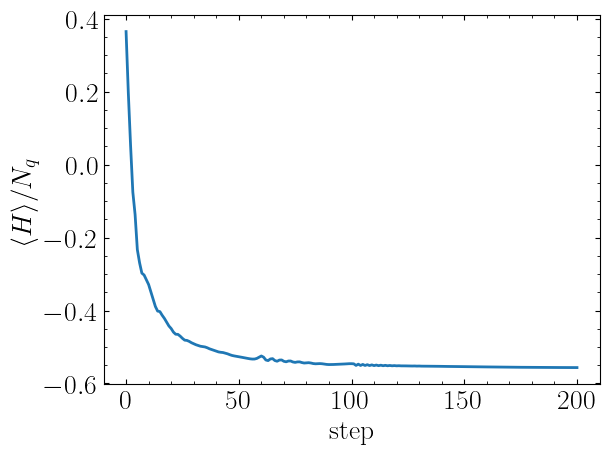

Final value of the ground-state energy for beta 1.8 = -0.610 


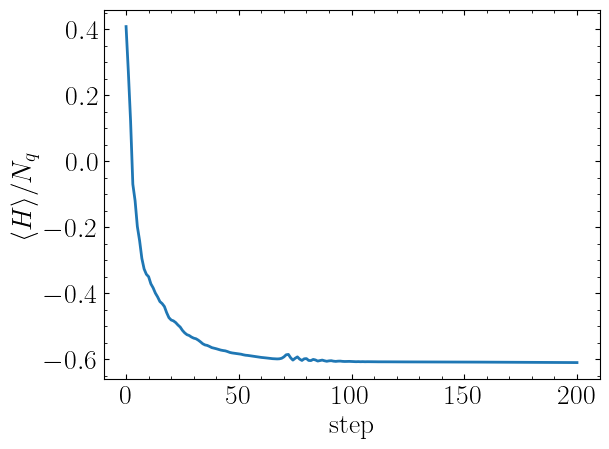

In [9]:
PLOT = True
E0 = []
max_iterations = 200
conv_tol = 1e-5
angles = {}

dev2 = qml.device("default.qubit", wires = range(6))
@qml.qnode(dev2)
def state(weights):
    ansatz(weights)
    return qml.state()

for b in beta:
    energy = []
    dev = qml.device("default.qubit", wires = range(6))

    H = Hamiltonian(b)
    @qml.qnode(dev)
    def cost_fn(weights): 
        ansatz(weights)
        return qml.expval(H)

    theta = np.random.uniform(-np.pi, np.pi, (68,3,))
    opt = qml.optimize.AdamOptimizer(stepsize=1e-1)

    # store the values of the cost function
    energy.append(circuit(theta) / 3.)

    for n in range(max_iterations):

        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        E = cost_fn(theta)/3.
        energy.append(E)

        # if n % 10 == 0:
        #     print(f"Step = {n},  Energy = {E:.8f} <H>/Nq")

        if np.abs(E - prev_energy) <= conv_tol:
            break
        if n == 100:
            opt.stepsize /= 2.
    
    print(f"Final value of the ground-state energy for beta {b:.1f} = {E:.3f} ")
    
    E0.append(E)
    angles[f"{b:.1f}"] = theta
    
    if PLOT:
        plt.plot(energy)
        plt.ylabel(r"$\langle H \rangle / N_q $")
        plt.xlabel(r"$\rm step $")
        plt.show()

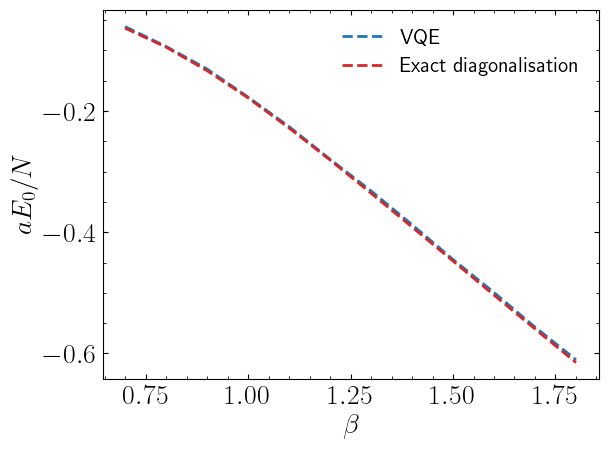

In [15]:
plt.plot(beta, E0, color = "tab:blue", ls="dashed")
plt.plot(beta, np.array(E0_ed)/3, color = "tab:red", ls="dashed")
plt.legend(["VQE", "Exact diagonalisation"], fontsize=15)
plt.xlabel("$\\beta$")
plt.ylabel("$aE_0/N$")
plt.show()

### Find the first excited state

See [this paper](https://www.annualreviews.org/doi/pdf/10.1146/annurev-conmatphys-020911-125018) for details.

$$ \mathcal{P}_0 = |\psi_0\rangle\langle\psi_0| \quad , \quad \langle\mathcal{H}^\prime\rangle = \langle\mathcal{H}\rangle + \alpha \langle \psi_1| \mathcal{P}_0 | \psi_1 \rangle = \langle\mathcal{H}\rangle + \alpha |\langle \psi_1| \psi_0 \rangle |^2 $$

/Users/jackaraz/packages/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:698: ComplexWarning: Casting complex values to real discards the imaginary part
  onp.add.at(A, idx, x)


Final value of the ground-state energy for beta 0.7 = 0.295 


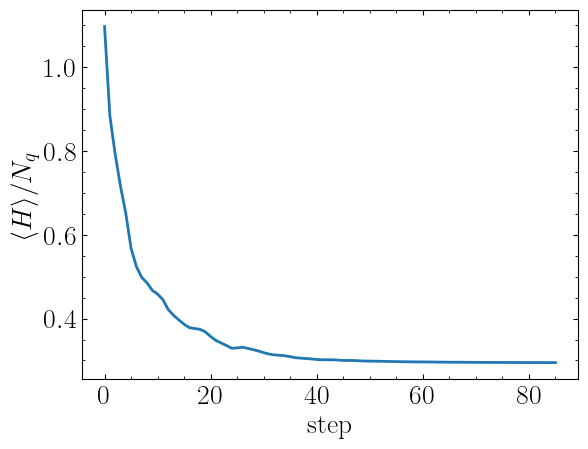

Final value of the ground-state energy for beta 0.8 = 0.206 


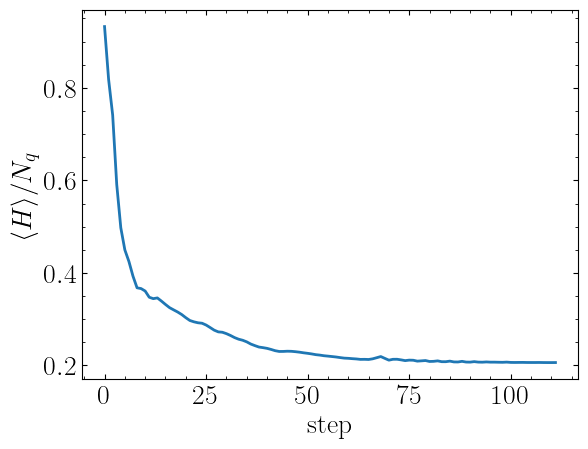

Final value of the ground-state energy for beta 0.9 = 0.122 


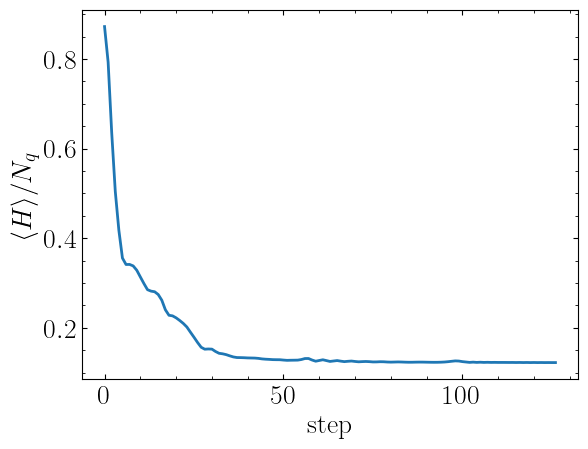

Final value of the ground-state energy for beta 1.0 = 0.051 


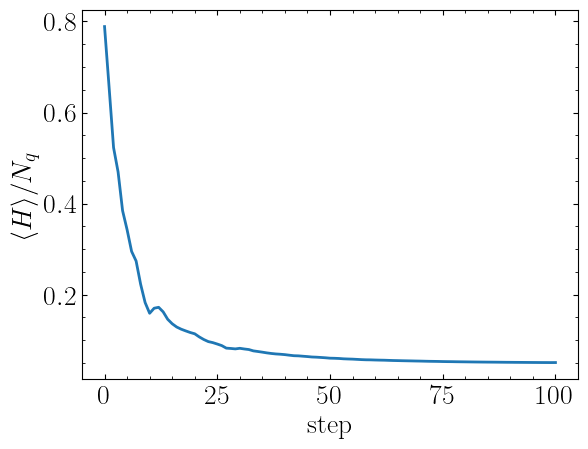

Final value of the ground-state energy for beta 1.1 = -0.019 


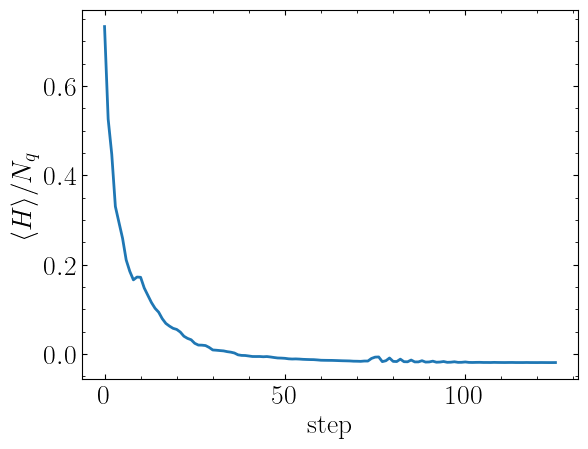

Final value of the ground-state energy for beta 1.2 = -0.085 


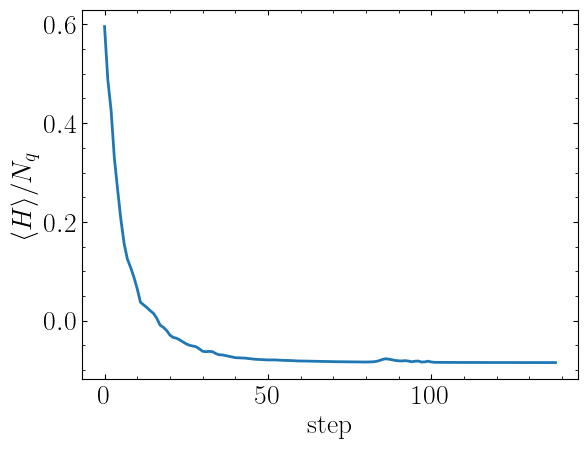

Final value of the ground-state energy for beta 1.3 = -0.145 


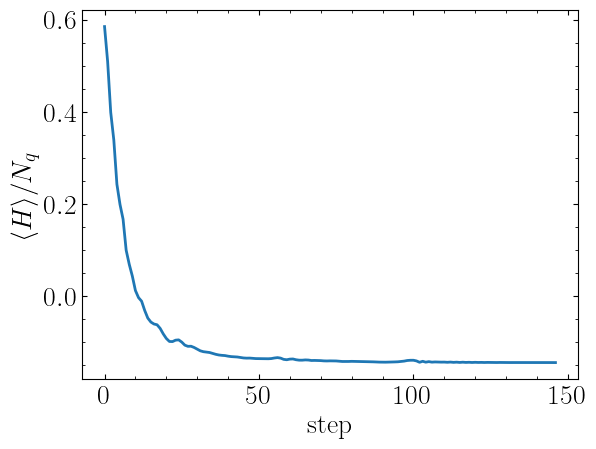

Final value of the ground-state energy for beta 1.4 = -0.202 


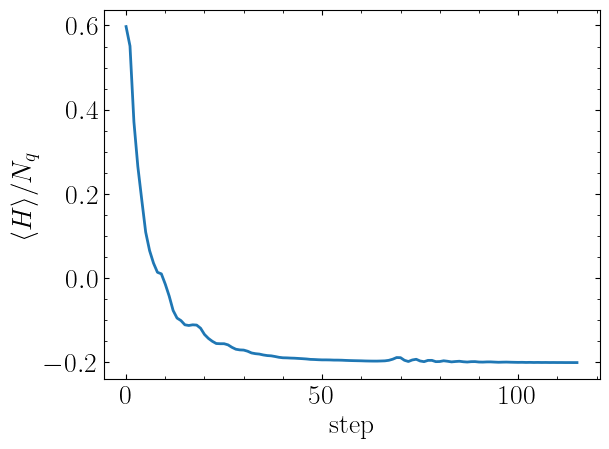

Final value of the ground-state energy for beta 1.5 = -0.256 


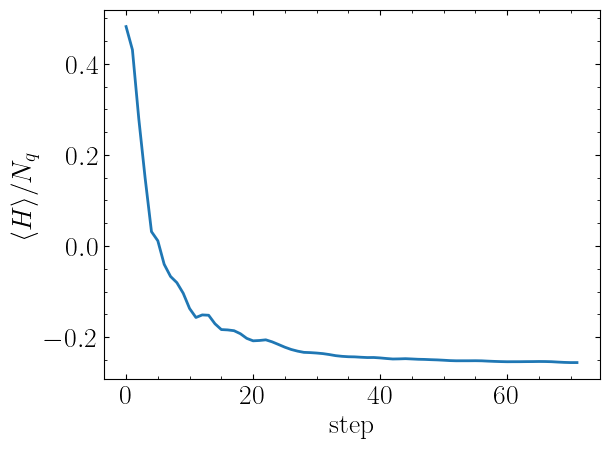

Final value of the ground-state energy for beta 1.6 = -0.314 


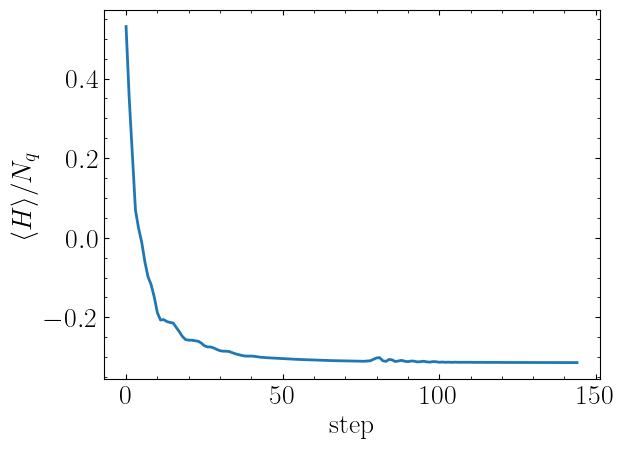

Final value of the ground-state energy for beta 1.7 = -0.366 


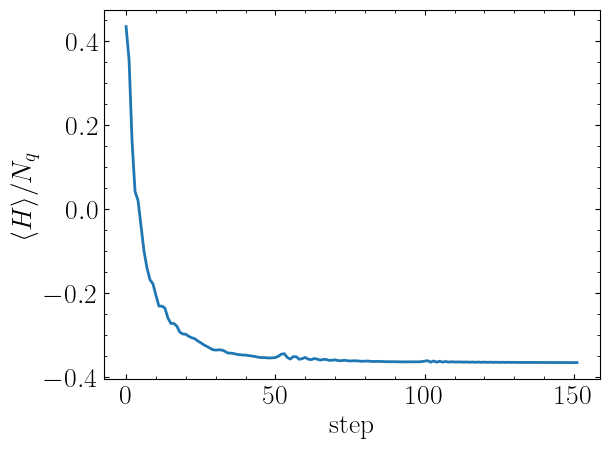

Final value of the ground-state energy for beta 1.8 = -0.418 


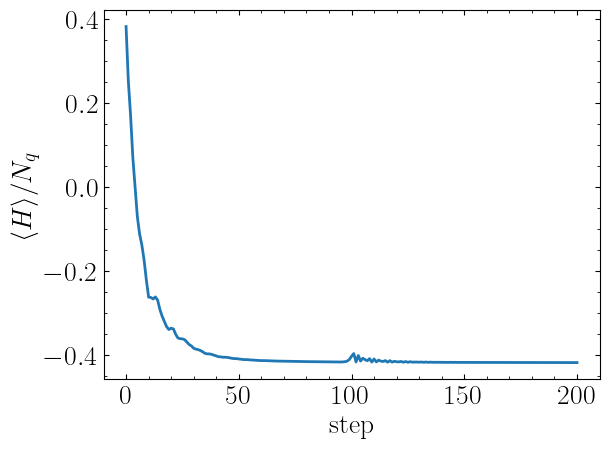

In [16]:
PLOT = True
E1 = []
max_iterations = 200
conv_tol = 1e-5
angles_e1 = {}

for b in beta:
    energy = []
    dev = qml.device("default.qubit", wires = range(6))

    H = Hamiltonian(b)
    
    phi0 = state(angles[f"{b:.1f}"]).reshape(1,64)

    @qml.qnode(dev)
    def expval(weights): 
        ansatz(weights)
        return qml.expval(H)
    
    theta = np.random.uniform(-np.pi, np.pi, (68,3,))
    opt = qml.optimize.AdamOptimizer(stepsize=1e-1)

    # store the values of the cost function
    energy.append(circuit(theta) / 3.)

    for n in range(max_iterations):

        def cost_fn(weights): 
            current_state = state(weights)
            return expval(weights) + 2. * np.square(np.abs(current_state @ phi0.conj().transpose()))
        
        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        E = expval(theta)/3.
        energy.append(E)

        # if n % 10 == 0:
        #     print(f"Step = {n},  Energy = {E:.8f} <H>/Nq")

        if np.abs(cost_fn(theta) - prev_energy) <= conv_tol:
            break
        if n == 100:
            opt.stepsize /= 2.
    
    print(f"Final value of the ground-state energy for beta {b:.1f} = {E:.3f} ")
    
    E1.append(E)
    angles_e1[f"{b:.1f}"] = theta
    
    if PLOT:
        plt.plot(energy)
        plt.ylabel(r"$\langle H \rangle / N_q $")
        plt.xlabel(r"$\rm step $")
        plt.show()

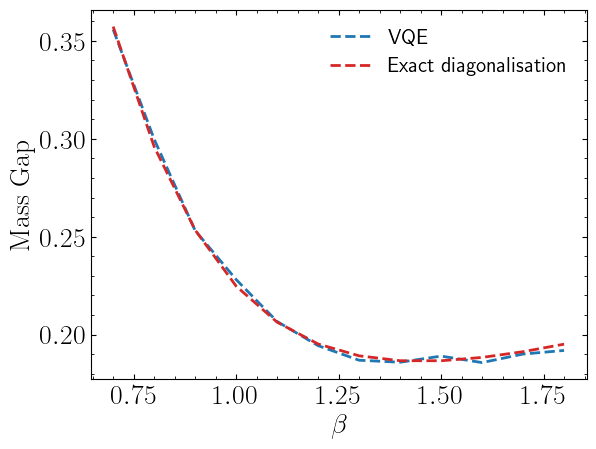

In [17]:
plt.plot(beta, np.array(E1) - np.array(E0), color = "tab:blue", ls="dashed")
plt.plot(beta, np.array(E1_ed)/3. - np.array(E0_ed)/3., color = "tab:red", ls="dashed")

plt.legend(["VQE", "Exact diagonalisation"], fontsize=15)
plt.xlabel("$\\beta$")
plt.ylabel("${\\rm Mass\ Gap}$")
plt.show()